I have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales.

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

In [40]:
# imports library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
import seaborn as sns
from  statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
#load dataset
data = pd.read_csv("marketing_sales_data.csv")

The dataset provided is a .csv file (named marketing_sales_data.csv), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales.

In [17]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


i observe about the different variables included in the data.
The data includes the following information:
- TV promotion budget (expressed as "Low", "Medium", or "High")
- Radio promotion budget
- Social media promotion budget
- Type of influencer that the promotion is in collaboration with (expressed as "Mega", "Macro", or "Micro", or "Nano")
- 
**Note**: Mega-influencers have over 1 million followers, macro-influencers have 100,000 to 1 million followers, micro-influencers have 10,000 to 100,000 followers, and nano-influencers have fewer than 10,000 followers.
Sales accrued from the promotion

In [5]:
# dataset shape 
data.shape

(572, 5)

In [6]:
#checking null 
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [7]:
data.isna().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [8]:
#boolean indication along with columns
data.any(axis = 1)

0      True
1      True
2      True
3      True
4      True
       ... 
567    True
568    True
569    True
570    True
571    True
Length: 572, dtype: bool

In [12]:
#drop missing values

data.dropna(axis = 0).reset_index(inplace = True, drop = True)

In [15]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.

data.isna().any(axis = 1).sum()

np.int64(3)

In [18]:
# drop the three missing value to prepare data for the modeling
data = data.dropna(axis = 0)

# Model Assumptions
- The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context.

**Note**: Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

- Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions.

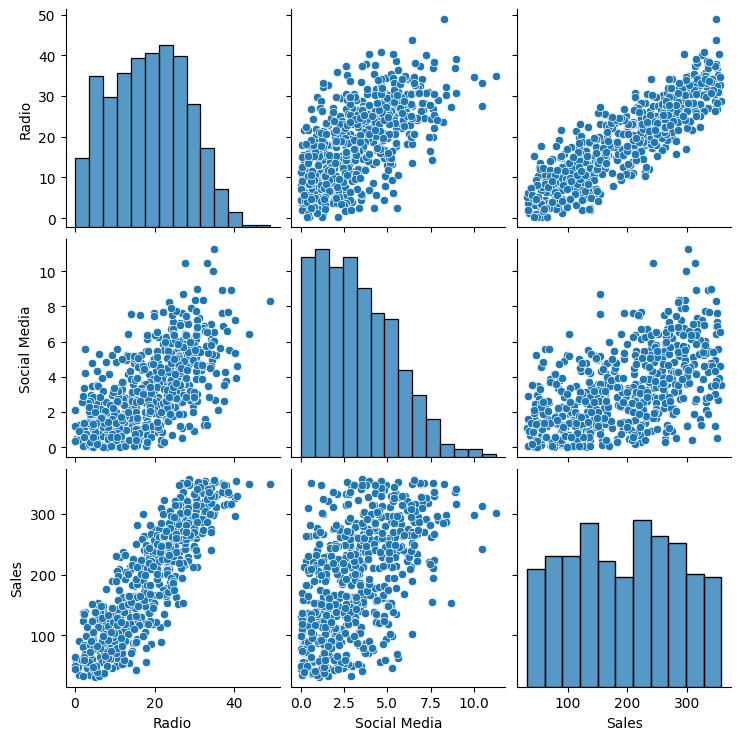

In [16]:
sns.pairplot(data)

In the scatterplot **Sales** over **Radio**. All the points are clusters around the line which indicates a positive association between two variables.so the first lineaity assumption is met.

# Model building


In [21]:
#next we will separate the import metrics from the dataset.

ols_data = data[['Radio', 'Sales']]
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [22]:
# write a ols formula 
ols_formula = "Sales ~ Radio"


# Implement the Ordinary Least Squares (OLS) approach for linear regression.

In [27]:
OLS = ols(formula = ols_formula, data = ols_data)

In [28]:
# fit the model to the dat

model = OLS.fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.07e-176
Time:                        13:02:04   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient here being the y-intercept and the slope "m" 
- The y-intercept is 41.5326
- The slope is 8.1733

The linear equation to express the relationship between  sales and radio promotion budget in the form of y= slope*x+y-intercept


The slope in this context mean 
- one interpretation: if a company spend a 1 million dollars more for promoting their products/services on the radio, the company's sales would be increase by 8.1733 millions dollars an average


<Axes: xlabel='Radio', ylabel='Sales'>

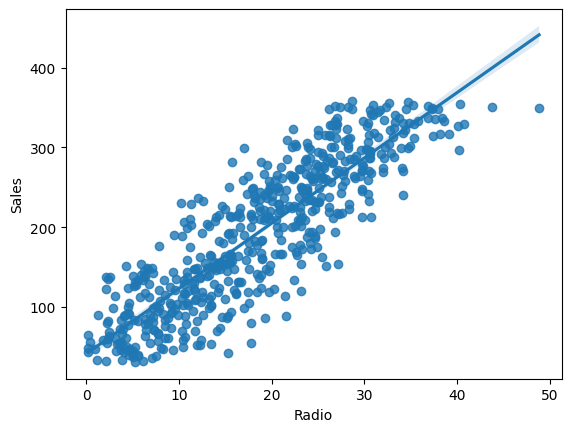

In [31]:
#finish model assumption 

sns.regplot(x = "Radio", y = "Sales", data = ols_data)

The linear relationship between two varibles along with the best fit line. this confrim the linearity

In [33]:
# Residual
residuals = model.resid

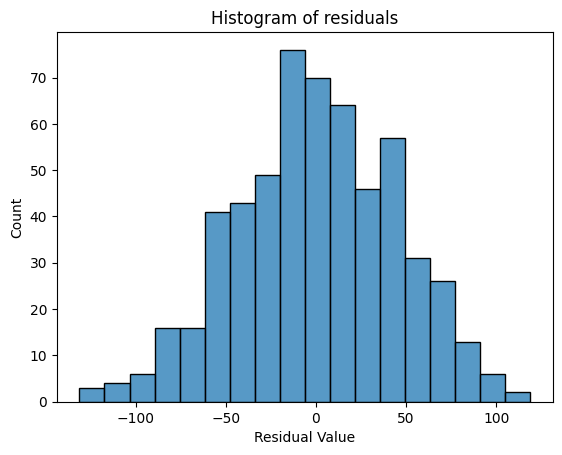

In [36]:
# visualize the distribution of residual
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of residuals")
plt.show()

The distribution of residuals is normal. This indicates that the assumption of normality is likely met.

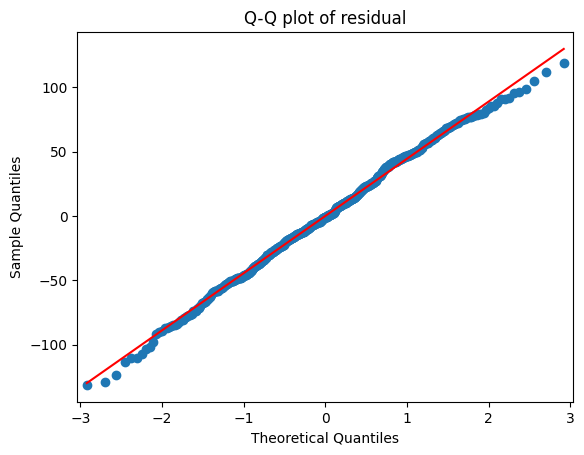

In [41]:
#Create a qqplot
sm.qqplot(residuals, line = 's')
plt.title("Q-Q plot of residual")
plt.show()

# Check the assumptions of independent observation and homoscedasticity.
getting the fitted value from the model

In [43]:
fitted_values = model.predict(ols_data["Radio"])

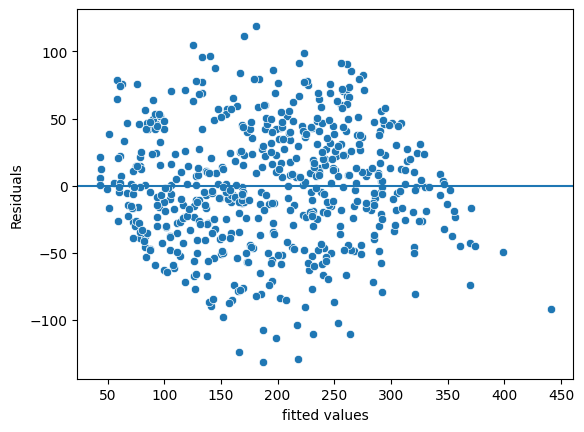

In [44]:
# Create a scatterplot of the residuals against the fitted values.
fig = sns.scatterplot(x = fitted_values, y = residuals)
fig.axhline(0)
fig.set_xlabel("fitted values")
fig.set_ylabel("Residuals")
plt.show()

In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

# Conclusion
What are the key takeaways?

- Data visualizations and exploratory data analysis can be used to check if linear regression is a well suited approach for modeling the relationship between two variables.
The results of a linear regression model can be used to express the relationship between two variables.
What results can be presented from this.

- In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average. Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

- The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true.

- In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, we  reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

- The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.

**How would we frame  findings to external stakeholders?**

- Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of 0.000 and a standard error of 0.194. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with an 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio. Also, it is recommended that the relationship between the two variables (radio promotion budget and sales) be further examined in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services.